In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [17]:
#Importing data
full_szns = pd.read_csv('full_seasons.csv', index_col=[0])
PO_teams = pd.read_csv('Playoff_Teams.csv', index_col=[0])
noPO_teams = pd.read_csv('Non_Playoff_Teams.csv', index_col=[0])

## Background / Motivation

When considering topics for this project, Krish’s Fanclub first looked to apply data science to their collective interests. After deliberation, it became clear that in addition to a deep love for Python and statistics, as a group, we were also united by our interest in sports. So, as Northwestern students in the greater Chicago area, we first looked to focus our project on the main professional teams in Chicago: The Bulls, The Blackhawks, The Bears, and The Chicago Fire. We decided to center our project on The Blackhawks as the NHL season is in progress throughout all of winter quarter. When the project first started, the NHL season was around its halfway point. At this stage it can become clear which teams are the strongest, which are on the fence for reaching playoffs, and which teams are clearly out of the race for the postseason. With this in mind, Krish’s Fanclub took interest in determining the The Blackhawks’ chances in reaching the playoffs. This season The Blackhawks are playing very poorly, and it became clear upon inspection that any data analysis related to playoff chances would most likely produce results stating that The Blackhawks would not reach the postseason. For this reason, we turned our attention to The Nashville Predators, a team on the fence for playoff contention. 
	
Data analytics has become more and more prevalent in the sports world. Now, MVP conversations, potential personnel lineups, and the chances of a team winning a game all include numbers and statistics. The power of analytics and its implications in the sports world were highlighted in the popular movie Moneyball. The film tells the true story of how the general manager for the baseball team the Oakland A’s used analytics to build a team and win games on an unprecedented level. Most professional sports teams today now have dedicated analytics teams to reveal insights that may give a winning edge. Motivated by this widespread movement, Krish’s fanclub decided to look at the Nashville Predators chances of reaching playoffs with the implications that the insight could potentially develop a clear strategy enabling the team to reach the postseason.


## Problem statement 

The Nashville Predators, like any other NHL team, aspires to qualify for the playoffs. At the start of this project around halfway through the season, with 23 wins and 18 losses, the Predators chance to make the playoffs was slim. The objective of this research was to develop a linear regression model that predicted what the Nashville Predators had to do in the second half of their season to secure a playoff spot. To achieve this goal, we planned to train our model on data from the last 10 years of NHL teams that made the playoffs, incorporating factors such as wins, losses, home and away games, and goal differential.

With the availability of information on professional sports publicly available, the data analyzed from this project was planned to be taken from sources such as NHL.com and Hockey-Reference.com. We planned to select the last 10 years of data as this provided a reasonable time frame that captured recent trends in the league. We also focused on teams that qualified for the playoffs in these years, as they represented a successful subset of the league. Factors such as wins, losses, home and away games, and goal differential were considered, as they were known to have a significant impact on team success.

Since we were dealing with features that belong to both playoff and non-playoff teams, we knew we were dealing with a classification problem. Our goal was to develop a predictive model that could accurately classify a team as a playoff or non-playoff team based on their performance in the first half of the season. To evaluate the accuracy of our model, we sought to test it on a randomly selected playoff team from each of the 10 seasons, which was excluded from the training dataset. The false positive and false negative rates will be used to calculate the precision of our model, ensuring that it provides dependable predictions.

To improve the model, we used the strongest predictors and performed transformations to achieve a better fit. After building a classification model, we planned to perform exploratory analysis in order to find the qualities of playoff teams. With this insight, we hoped to build a strategy that the Predator’s could implement to reach the playoffs. With insight that certain factors are more valuable than others, a strategy could allow the Predators to focus efforts on areas that have the largest impact on reaching the postseason. 

Ultimately, our research aimed to provide the Nashville Predators with valuable insights into their odds for reaching the playoffs and what they needed to do to qualify. By developing a data-driven approach to team performance, we hope to contribute to the ongoing efforts to improve the team's success on the ice.


## Data sources

The data from this project came from three major sources. The first was a public Kaggle dataset with statistics on the NHL seasons from 2000 to 2020. This dataset included information including each match in the season, the competitors, the result, and whether it was a regular season game or not. This dataset provided the majority of the data that was analyzed and allowed us to look at win totals and goal differentials as a predictor for reaching the postseason. 

The second and third main datasets used provided current season statistics for the Nashville Predators. With this information, we could evaluate the current success of the team and predict playoff odds based on a variety of predictors. These datasets were from QuantHockey.com and hockey-reference.com which provide publicly available hockey statistics on the NHL. Both of these datasets contributed similar insight as the Kaggle dataset such as team record, game results, away/home status for those games, and game scores.
	The websites for these datasets are as follows:

https://www.kaggle.com/datasets/martinellis/nhl-game-data
https://www.quanthockey.com/nhl/team-game-logs/nashville-predators-2022-23-nhl-game-log.html
https://www.hockey-reference.com/leagues/NHL_2023_games.html


## Stakeholders

The three main stakeholders identified that could benefit from our project were The Nashville Predators organization, sports betting companies, and Predators fans. The Nashville Predators organization were classified as stakeholders as insight into how to reach playoffs and the odds of reaching playoffs could be very valuable for the general manager as well as coaches and players. If a strategy to reach the playoffs could be formulated, then coaches could focus their efforts in certain areas that would have the most effect on the team’s success. Coaches could know when to rest players on games that were less important, and when to play the best players for vital games. For a general manager who runs the organization at a higher level, insight from our project could help the manager decide on coaching staff to reach the playoffs. Before our analysis, we rationalized that if away wins were identified to be more important than home wins, then a general manager might focus on finding coaches who were more successful at getting teams to win at away games.
	
Sports betting companies were identified as stakeholders due to the connection between sports betting and analytics. Sports betting lines attempt to emulate the odds of certain outcomes while also adjusting to the money placed on either side of the bet. In order to create these lines, sports betting organizations use complex algorithms taking in many predictors and past information as a base point. Oftentimes, sports betting lines reflect the probability events will occur in the form of the payouts they generate. Sports betting companies could benefit from our project if we are successful as our insight may help these companies adjust their betting lines to be more in line with our predicted odds that the Predators’ reach the playoffs. 
	
Dedicated fans of sports teams consume large amounts of information on their favorite teams. This is evident from media sources such as The Athletic which provides fans with news on each of their favorite teams. Some of the most popular information on sports teams is a team’s success and their odds of reaching the playoffs. If our project is successful, dedicated Predators’ fans will want to understand our results in order to learn more about their team’s current standing. Furthermore, media outlets spreading information about the Predator’s will find our results relevant and a potential source of revenue for generating views to their websites and publications. 


## Data quality check / cleaning / preparation 

The original dataset contained 26305 observations, each associated with an NHL game from seasons spanning 2000 to 2020 [1]. Because we wanted to look at a teams performance over the course of an entire season to see if they made the playoffs, there was a lot of data pivoting involved. Ultimately, we created new dataframes that contained overall team stats for 10 total seasons. During this process, we found that there were some duplicate values for the 2018-2019 and 2019-2020 seasons. There were also some missing values for the 2012-2013 season. Because there were plenty of other seasons with full game data available, we decided to exclude those three seasons from our anaysis. Excluding the 2012-2013 season would have posed a problem if we decided to use time as a predictor in our analysis because there would have been a gap. After much discussion amongst group members, we decided time was not a very useful predictor in our project. (See the model limitations section for further explaination.) In the data wrangling process, pivoting the data required taking the stats from the individual game data and aggregating them for each team for each season. For example, we looked at home goals and away goals for each game and used those to create total goals scored, total goals against, and goal differential for each team per season. This allowed us to analyze aggregate season statistics for each team. We also added the response variable `made_playoffs` in our cleaned datasets using lists of playoff contenders. Combining the season statistics allowed us to directly look at the factors that contribute to a playoff team.

<AxesSubplot:xlabel='made_playoffs', ylabel='goal_diff'>

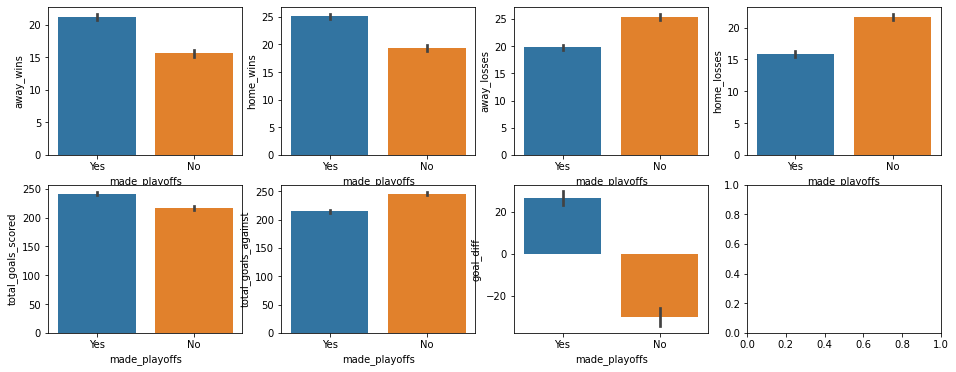

In [18]:
# using barplots to show the associations of the predictors with the response
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (16,6))
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

sns.barplot(ax = axes[0,0], y = full_szns.away_wins, x = full_szns.made_playoffs)
sns.barplot(ax = axes[0,1], y = full_szns.home_wins, x = full_szns.made_playoffs)
sns.barplot(ax = axes[0,2], y = full_szns.away_losses, x = full_szns.made_playoffs)
sns.barplot(ax = axes[0,3], y = full_szns.home_losses, x = full_szns.made_playoffs)
sns.barplot(ax = axes[1,0], y = full_szns.total_goals_scored, x = full_szns.made_playoffs)
sns.barplot(ax = axes[1,1], y = full_szns.total_goals_against, x = full_szns.made_playoffs)
sns.barplot(ax = axes[1,2], y = full_szns.goal_diff, x = full_szns.made_playoffs)

## Exploratory data analysis

### Historical win counts as a threshold for playoff caliber teams

In [19]:
print('Median total wins for a playoff team:', (PO_teams.away_wins+PO_teams.home_wins).median())
print('Median total wins for a non-playoff team:', (noPO_teams.away_wins+noPO_teams.home_wins).median())

Median total wins for a playoff team: 46.0
Median total wins for a non-playoff team: 35.0


Text(0.5, 1.0, 'Win counts of playoff teams (red) vs non playoff teams (blue)')

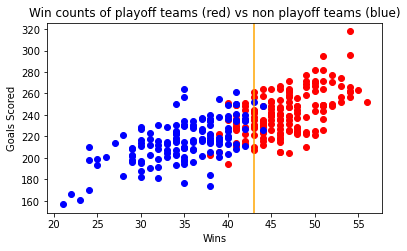

In [20]:
#defining a win threshold for playoff teams
plt.figure(figsize=(6,3.5))
plt.scatter(x=PO_teams.total_wins,y = PO_teams.total_goals_scored,c="red")
plt.scatter(x=noPO_teams.total_wins,y = noPO_teams.total_goals_scored,c="blue")
plt.xlabel("Wins")
plt.ylabel("Goals Scored")
plt.axvline(x = 43, c='orange')
plt.title('Win counts of playoff teams (red) vs non playoff teams (blue)')

### Historical goal differentials as a threshold for playoff caliber teams

In [21]:
print('Median goal differential for a playoff team:', (PO_teams.goal_diff).median())
print('Median goal differential for a non-playoff team:', (noPO_teams.goal_diff).median())

Median goal differential for a playoff team: 23.5
Median goal differential for a non-playoff team: -27.0


Text(0.5, 1.0, 'Goal differential for playoff teams (red) vs non playoff teams (blue)')

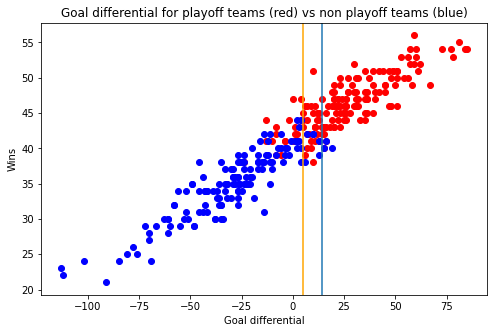

In [22]:
#defining a goal differential threshold for playoff teams
plt.figure(figsize=(8,5))
plt.scatter(x=PO_teams.goal_diff,y = PO_teams.total_wins,c="red")
plt.scatter(x=noPO_teams.goal_diff,y = noPO_teams.total_wins,c="blue")
plt.xlabel("Goal differential")
plt.ylabel("Wins")
plt.axvline(x = 14)
plt.axvline(x = 5, c='orange')
plt.title('Goal differential for playoff teams (red) vs non playoff teams (blue)')

In [23]:
full_szns.corrwith(full_szns.goal_diff).total_wins

0.9491691246524291

### EDA Insights:


 - While playoff teams have a median win count of 46, a visualization of win count allows us to see that winning 43 games nearly guarantees that a team will reach the playoffs. Thus, 43 wins is a better threshold for a playoff caliber team than 46. 
 
 
 - Similarly, despite a wide variance in median goal differentials for playoff teams and non-playoff teams (23.5 and -27, respectively), visualizing goal differentials through a scatterplot can help us find a more reliable threshold.
     - If a team has a goal differntial of at least 14, they seem very likely to make it in to the playoffs. If a team has a goal differential greater than 5, they still seem likely to make the playoffs, but slightly less likely than if they have a goal differential of 14.
     
     
 - We can also see that wins and goal differential seem to have a strong, positive linear relationship. This is corroborated by their correlation coefficient of .95


## Approach

### General Approach

Detailed below, we created two separate models as part of our problem.  

Firstly, as we determined that number of wins is hugely important for determining whether a team would make the playoffs or not. We created a linear regression model to predict the number of games that the Nashville Predators are predicted to win based on their current standings.

Secondly, with our prediction of what the Nashville Predators end-season-stats would be. We created a logistic regression model that predicts whether a team will make the playoffs or not based upon their end-season-statistics. 

Through the combination of these two models, we were able to predict what the Nashville Predators end-season-stats would look like based on their current statistics and input this information into our logistic model to determine whether the Predators would make the playoffs or not. 



### Approach: Linear Regression

In order to predict how many games the Predators are expected to win based off of statistical benchmarks of past teams, a linear regression model was used, and in optimizing the model, RSME was prioritized since prediction accuracy was most valued. A problem that arose, which led to an unorthodox method being used, was that in determining  the best combination of predictors, away games and goal differential was found to predict total wins most accurately - but, because the final away game win count isn't yet known, a simple linear regression model using goal differential to predict away game win count was first made in order to predict away games won. Assuming the Predators continued their goal differential of -5 in away games, they are predicted to have between 17.8 and 18.6 games won with 95% confidence (this number was rounded to 18). Now that a solid prediction for the Predators away game win count was present, `away_wins` and `goal_diff` could be used to predict home wins and total wins. With 95% confidence, the multiple regression model conisting of `away_wins` and `goal_diff` predicts that with the Predators will end with 22 home games won, assuming 18 away games are won and their home goal differential remains at 0, combining for a total win count of 40. This prediction is corroborated the main model, which predicted the Predators total game win count to be between 39 and 40. This win count is below the threshold, suggesting that the Predators will not reach the statistical benchmark of 43 that denotes a playoff likely team.

### Approach: Logistic Regression

To predict whether the Predators would make the playoffs or not, we chose to create a **logistic regression model** that would utilize relevant predictors to form a prediction of whether a team made the playoffs or not. With this model, we could create predictions on **whether the Predators would make the playoffs or not** provided their current standings while also creating separate predictions concerning **what the Predators would need to achieve (in terms of our predictors) by the ends of the season to make the playoffs**. 

Provided the standard performance metrics, we chose to optimize for **precision** as we wanted to minimize the number of false positives that our model produced. We believed that our model, or more accurately our recommendations, incorrectly predicting a team **to make** the playoffs was more far more egregious than our model incorrectly predicting a team **to not make** the playoffs. In other words, if stakeholders (the Predators) chose to adopt our recommendations, we would like our recommendations to **ensure** their qualification into the playoffs with the **highest certainty**. Our approach was relatively straightforward, we utilized EDA, variable selection, and interactions/transformations to determine the best possible model. One problem we did not anticipate; however, was complete quasi-separation within a few of our variables. Some, especially the variables with some of the categorical-like entries, would combine together in the model to create **complete quasi-separation**. As we were unfamiliar with how to handle these types of exceptions, some variable interactions were removed. Due to these unanticipated problems, our model went through many iterations attempting to balance accuracy, precision, and general validity. Our problem did not already have a solution on Kaggle.

## Developing the model

 ### Linear Regression

Firstly, the EDA done in the beginning of the project was essential in revealing the nature and strength of the relationship between goal differential and total wins. Not only was the correlation exrtemely high (.94), it was also clearly linear, negating the need for any transformation of goal differential. Neither assumptions of linearity or constant varience were violated in the chosen model, and variable transformation and interaction were not justified and did not lead to improvemnets in prediction accuracy when testing them. In fact, the simple multiple linear regression consisting of the two significant predictors was the most effective in predicting total wins based on RSME. Outliers and influential points, were tested for but found to be insignificantly affecting the model. There was a fairly high number of observations (about 300), and because no transformations were used, it is unlikely that overfitting occured). There was no collinearity between `away_wins` and `goal_diff`. Finally, while variable selection processes were attempted, they yielded no useful models. While optimizing the model was a success, one of the possible issues of this dataset was that many of the predictors were so closely related (ie. home/away wins/losses, goal differential and total goals conceded and allowed) that when variable selection was used, the models that the proecesses would select would be models that fit the data entirely, leading to an r-squared of 1. Thus, variable selection was not used in this. There were few enough predictors that the EDA combined with some brute force was able to yield a very accurate model, but in the future, a dataset with a larger number of possible predictors could be useful and allow for an even more accurate model.

 ### Logistic Regression

Similar to the Linear model, the EDA was essential in revealing the important relationship between home/away wins, goal differential, and whether a team made the playoffs or not. Plotting the residuals of a basic model against our predictors, we found a similar "sigmoid" type of relationship between each variable and the response; however, in order to clean the relationship even further, we removed all influential points. After the removal of influential points, we worked upon optimizing the classification accuracy of our model. To address any overfitting in our model, we utilized sklearn to split our data into separate train/test datasets to see how well our model worked on data it had seen before as well as data it had never seen before. Utilizing these datasets, we experimented with Quadratic/Cubic variable transformation, interactions, as well as transformations/interactions at the same time. After comparing the classification accuracies, we chose to adopt a model containing our four significant predictors + a few notable interactions. These interactions primarily encapsulated the interactions between wins and goal differential, an interaction that we came upon intuitively as a successful NHL team must be able to score many goals, and be able to convert those goals into wins. Ultimately, we succeeded in our goal as our model predicted whether a team made the playoffs with 94.7% accuracy on testing data with a 95.12% precision.

#### Final Model Equation: 
'binary_playoffs~away_wins\*total_goals_against + home_wins\*total_goals_against+away_wins\*total_goals_scored+home_wins\*total_goals_scored'

## Limitations of the model with regard to inference / prediction

Using our model, the stakeholders will be able to immediately collect the data relating to predictors in the model. Because our prediction is based on data from previous seasons and employs current season data that is available immediately at the conclusion of each game, the model is easily adaptable. Because previous NHL data will always be available, our model should not be obsolete for a while. It would become obsolete if the NHL changes any major rules or the number of games per season changes. 

Other limitations we considered:  
Excluding the 2012-2013 season would have posed a problem if we decided to use time as a predictor in our analysis because there would have been a gap. After much discussion amongst group members, we decided time was not a very useful predictor in our project. While time may be important for individual player performance, we argue that it is not very useful as a predictor for overall sports team performance. There are so many variables that change in the middle of a season (such as player injuries, trades, coaching changes) and that are dependant on individual player performance that it is difficult to argue that a team is more or less likely to make the playoffs based on whether or not a team made the previous season. This is due to the fact that there are so many variables that change from one season to the next that cannot be accounted for by just looking at time.

## Conclusions and Recommendations to stakeholder(s)

After analyzing our models, we recommend that the Nashville predators win 11 more home games and 12 more away games based on the halfway point in their season. To reach a level of 75% confidence that they make the playoffs, the Predators need a 20 total home wins and 22 total away wins throughout the regular season. This recommendation is supported by our model that had 94.7% classification accuracy on testing data with a 95.12% precision. We also recommend that Nashville focus on maximizing a positive goal differential. We found that have a goal differential of at least 14 is an important factor in making the playoffs.

As demonstrated in our analysis, the Nashville Predators should especially emphasize away wins because they carry more weight than home wins. If Nashville continues on their current path after the halfway point in the season, our model is 18.7% confident that they make the playoffs. If Nashville continues on their current path, sports betting companies should advise that the lines favor "No" more than "Yes." For Predators fans, they should not be too hopeful for a playoff run this year. The Predators would have to change their current path if they want to make the playoffs. 

Generally, we found that teams need to win a little over half of their games to secure a spot in the playoffs. Away wins generally carry more pull than away wins, so other teams could also use this information. However, our model confidence in the additional 11 home wins and 12 away wins is specific to Nashville's 2022-2023 performance and playoff aspirations. Our model could be further developed and used as a reference point for other teams in the future based on past season data.

## GitHub and individual contribution

Github Link: https://github.com/twag25/303_2_krish_fanclub

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Tess Wagner</td>
    <td>Data cleaning and data wrangling</td>
    <td>Identified missing values and issues with the original datasets, pivoted the data to make it useful for our analysis, and used original data to calculate useful season summary statistics.</td>
    <td>27</td>
  </tr>
  <tr>
    <td>Jack McNally</td>
    <td>Data wrangling and EDA</td>
    <td>Compiled data amongst multiple seasons and performed initial EDA on current season data and the wrangled historical data.</td>
    <td>7</td>
  </tr>
    <tr>
    <td>Samuel Sword</td>
    <td>EDA and Linear Regression Model building</td>
    <td>Performed EDA to identify statistical benchmarks for playoff caliber teams and help in the construction of the linear regression model. Created, developed, and optimized the linear regression model in order to predict the Predators win count at the end of the season</td>
    <td>18</td>    
  </tr>
    <tr>
    <td>Elijah Nacar</td>
    <td>Logistic Regression Model Creation/Approach</td>
    <td>Utilized our relevant predictors to create many iterations of our logistic regression model. Addressed overfitting, influential points, and variable transformations/interactions. Optimized model for accuracy and precision.</td>
    <td>11</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

Tess: I like using Github much better than emailing pieces of code to each other. Last quarter, emailing code posed a challege because our dataset was so large. We ran into challenges when working on code simultaneously and trying to commit when there were different changes. However, I feel that we have saved a large amount of time using Github rather than navegating the process of emailing large files.

Samuel: The barrier of entry was frustrating, but once I got used to it I was able to see the benefits that come with using it. The more I use it, the more I suspect I'll grow to appreciate it. I do think it ultimately made collaboration easier.

Jack: I found the interface to have a steep learning curve. While it was nice to be able to work collaboratively in way similar to Google Docs, I found pushing and pulling to the Desktop app difficult. To overcome this, my groupmates and I used the web editor version of Github to make changes. At this point, I am relatively comfortable with GitHub and knowing how much it is used for other coding projects, I would use it again. 

Eli: While a better alternative to emailing code, it was difficult to coordinate with the group sometimes about committing changes to files that everyone was working on. I am comfortable with GitHub but feel as though the nature of the project (everyone working on one file) was not entirely conducive to its strong utility as a collaboration tool.

## References

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Ellis, Martin. NHL Game Data, 2021. Kaggle. https://www.kaggle.com/datasets/martinellis/nhl-game-data 

[2] Nashville Predators Game Log NHL 2022-2023, 2023. QuantHockey. https://www.quanthockey.com/nhl/team-game-logs/nashville-predators-2022-23-nhl-game-log.html 

[3] 2022-23 NHL Schedule and Results, 2023. Hockey Reference. https://www.hockey-reference.com/leagues/NHL_2023_games.html